# Project : Customer Service Requests Analysis  

***

#### Step 1: Importing useful Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Exporting and Reading data

In [40]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

In [41]:
## Getting idea about data

df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [42]:
print(" Shape of the data is ",df.shape)

 Shape of the data is  (364558, 53)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

#### Step 3: Missing value Check

In [44]:
df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [45]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

###### Replacing null value with mode,median and mean

In [46]:
df["Descriptor"].fillna("Inconvenience",inplace=True)
df["Location Type"].fillna("Street/Sidewalk",inplace=True)

x=df["Incident Zip"].median()
df["Incident Zip"].fillna(x,inplace=True)

Y=df["Incident Address"].mode()
df["Incident Address"].fillna('Y',inplace=True)

Z=df["Street Name"].mode()
df["Street Name"].fillna('Z',inplace=True)

M=df["Cross Street 1"].mode()
df["Cross Street 1"].fillna('M',inplace=True)

N=df["Cross Street 1"].mode()
df["Cross Street 1"].fillna('N',inplace=True)

P=df["Cross Street 2"].mode()
df["Cross Street 2"].fillna('P',inplace=True)

A=df["Address Type"].mode()
df["Address Type"].fillna('A',inplace=True)

B=df["City"].mode()
df["City"].fillna('B',inplace=True)

C=df["Facility Type"].mode()
df["Facility Type"].fillna('c',inplace=True)

D=df['Latitude'].mean()
E=df['Longitude'].mean()
F=df['X Coordinate (State Plane)'].mean()
G=df['Y Coordinate (State Plane)'].mean()
df["Latitude"].fillna(D,inplace=True)
df["Longitude"].fillna(E,inplace=True)
df["X Coordinate (State Plane)"].fillna(F,inplace=True)
df["Y Coordinate (State Plane)"].fillna(G,inplace=True)

I=df["Location"].mode()
df["Location"].fillna('I',inplace=True)

df.drop('Intersection Street 1',inplace=True,axis=1)
df.drop('Intersection Street 2',inplace=True,axis=1)
df.drop('Landmark',inplace=True,axis=1)
df.dropna(subset=['Closed Date'],inplace=True)
df.dropna(subset=['Resolution Action Updated Date'],inplace=True)
df.drop('School or Citywide Complaint',inplace=True,axis=1)
df.drop('Vehicle Type',inplace=True,axis=1)
df.drop('Taxi Company Borough',inplace=True,axis=1)
df.drop('Taxi Pick Up Location',inplace=True,axis=1)
df.drop('Bridge Highway Name',inplace=True,axis=1)
df.drop('Bridge Highway Direction',inplace=True,axis=1)
df.drop('Road Ramp',inplace=True,axis=1)
df.drop('Bridge Highway Segment',inplace=True,axis=1)
df.drop('Garage Lot Name',inplace=True,axis=1)
df.drop('Ferry Direction',inplace=True,axis=1)
df.drop('Ferry Terminal Name',inplace=True,axis=1)

df.dropna(subset=['School Region'],inplace=True)
df.dropna(subset=['School Code'],inplace=True)
df.dropna(subset=['School Zip'],inplace=True)

In [47]:
df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Address Type                      False
City                              False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)        False
Y Coordinate (State Plane)        False
Park Facility Name                False


In [48]:
df.shape

(362137, 39)

## Step 4: Draw a frequency plot for city-wise complaints

In [49]:
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df.dropna(subset=['Created Date'], inplace=True)

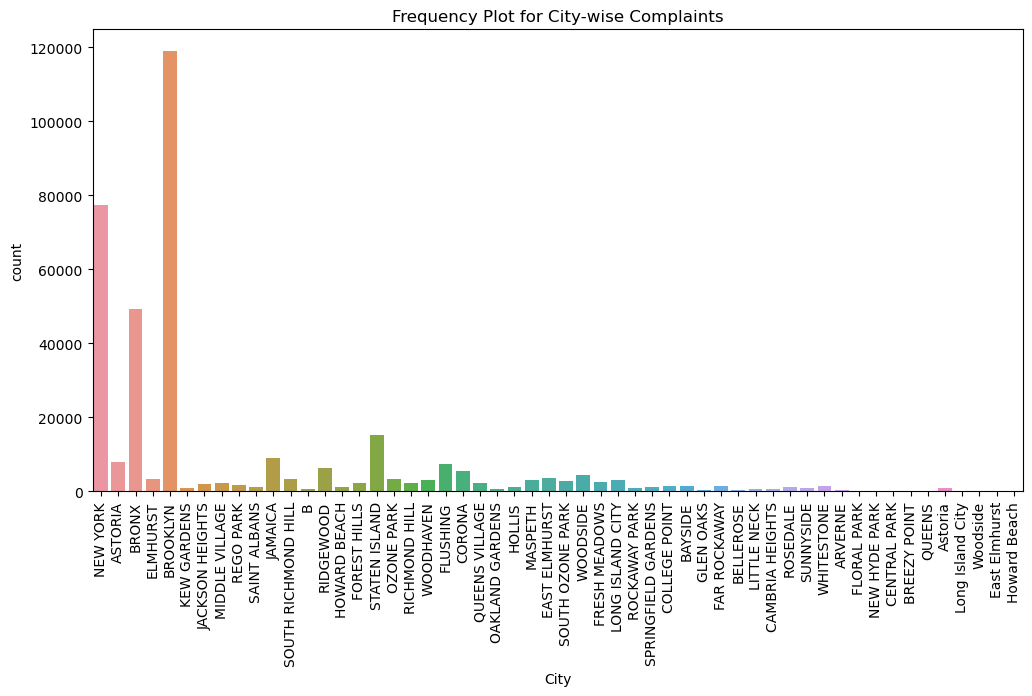

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df)
plt.title('Frequency Plot for City-wise Complaints')
plt.xticks(rotation=90)
plt.show()

In [51]:
df['City'].value_counts()

City
BROOKLYN               118841
NEW YORK                77281
BRONX                   49163
STATEN ISLAND           15332
JAMAICA                  8921
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5382
WOODSIDE                 4356
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3437
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3101
LONG ISLAND CITY         3026
SOUTH OZONE PARK         2668
FRESH MEADOWS            2451
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1093
ROSEDALE                 1091
SAINT

## Step 5: Draw scatter and hexbin plots for complaint concentration across Brooklyn

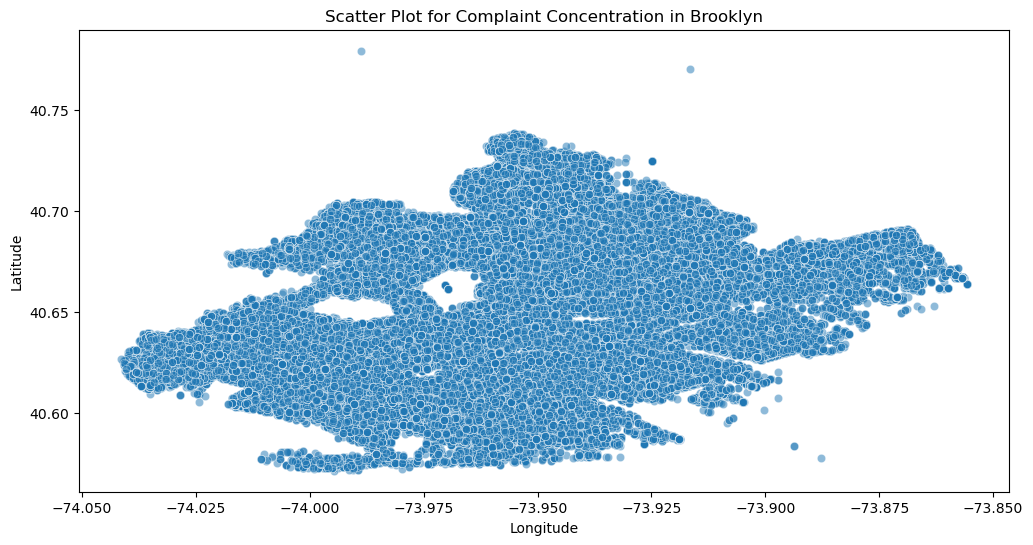

In [52]:
brooklyn_complaints = df[df['City'] == 'BROOKLYN']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=brooklyn_complaints, alpha=0.5)
plt.title('Scatter Plot for Complaint Concentration in Brooklyn')
plt.show()

<Figure size 1200x600 with 0 Axes>

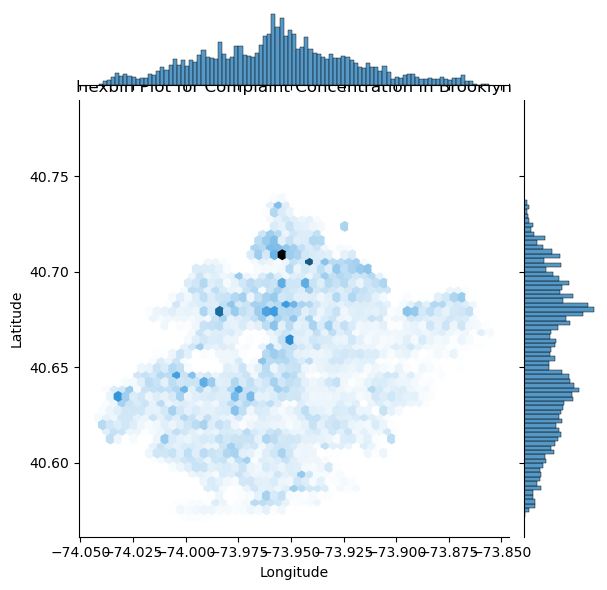

In [53]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='Longitude', y='Latitude', data=brooklyn_complaints, kind='hex')
plt.title('Hexbin Plot for Complaint Concentration in Brooklyn')
plt.show()

## Step 5: Find major types of complaints
#### Plot a bar graph of count vs. complaint types

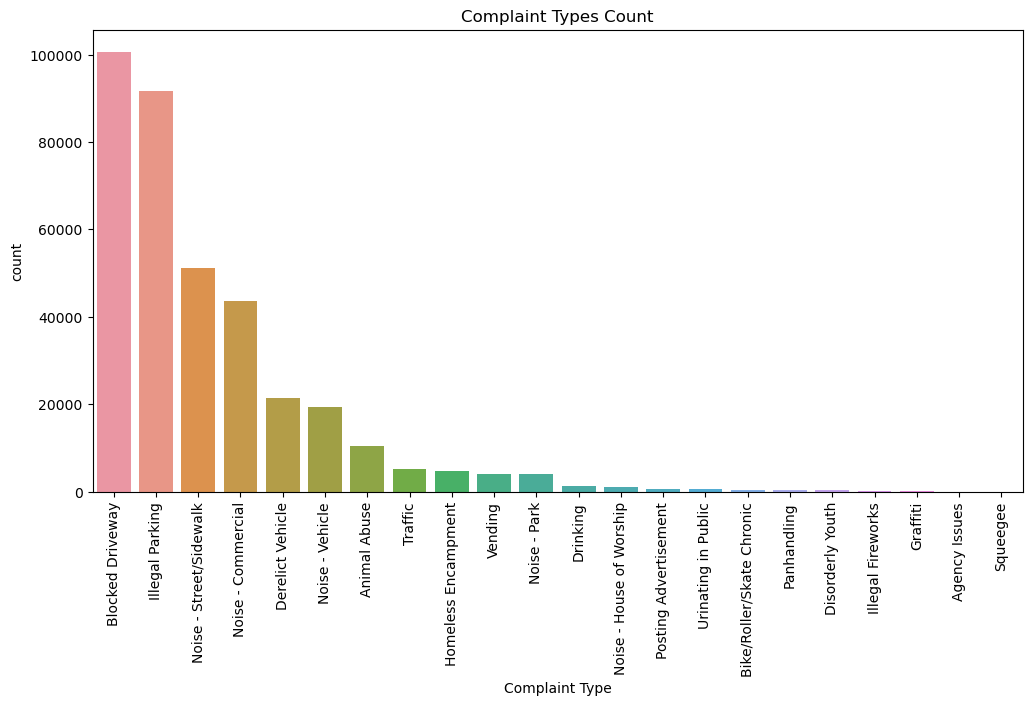

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Complaint Type', data=df, order=df['Complaint Type'].value_counts().index)
plt.title('Complaint Types Count')
plt.xticks(rotation=90)
plt.show()

### Find the top 10 types of complaints

In [55]:

top_10_complaints = df['Complaint Type'].value_counts().head(10)
print("Top 10 Complaint Types:")
print(top_10_complaints)

Top 10 Complaint Types:
Complaint Type
Blocked Driveway           100618
Illegal Parking             91705
Noise - Street/Sidewalk     51131
Noise - Commercial          43749
Derelict Vehicle            21516
Noise - Vehicle             19300
Animal Abuse                10530
Traffic                      5193
Homeless Encampment          4877
Vending                      4183
Name: count, dtype: int64


### Display the types of complaints in each city in a separate dataset

In [56]:

complaints_by_city = df.groupby('City')['Complaint Type'].value_counts().unstack(fill_value=0)
print("Complaints by City:")
print(complaints_by_city)

Complaints by City:
Complaint Type       Agency Issues  Animal Abuse  Bike/Roller/Skate Chronic  \
City                                                                          
ARVERNE                          0            46                          0   
ASTORIA                          0           170                         16   
Astoria                          0             0                          0   
B                                8             1                          2   
BAYSIDE                          0            53                          0   
BELLEROSE                        0            15                          1   
BREEZY POINT                     0             2                          0   
BRONX                            0          1971                         22   
BROOKLYN                         0          3191                        124   
CAMBRIA HEIGHTS                  0            15                          0   
CENTRAL PARK                    

## Step 6: Visualize the major types of complaints in each city

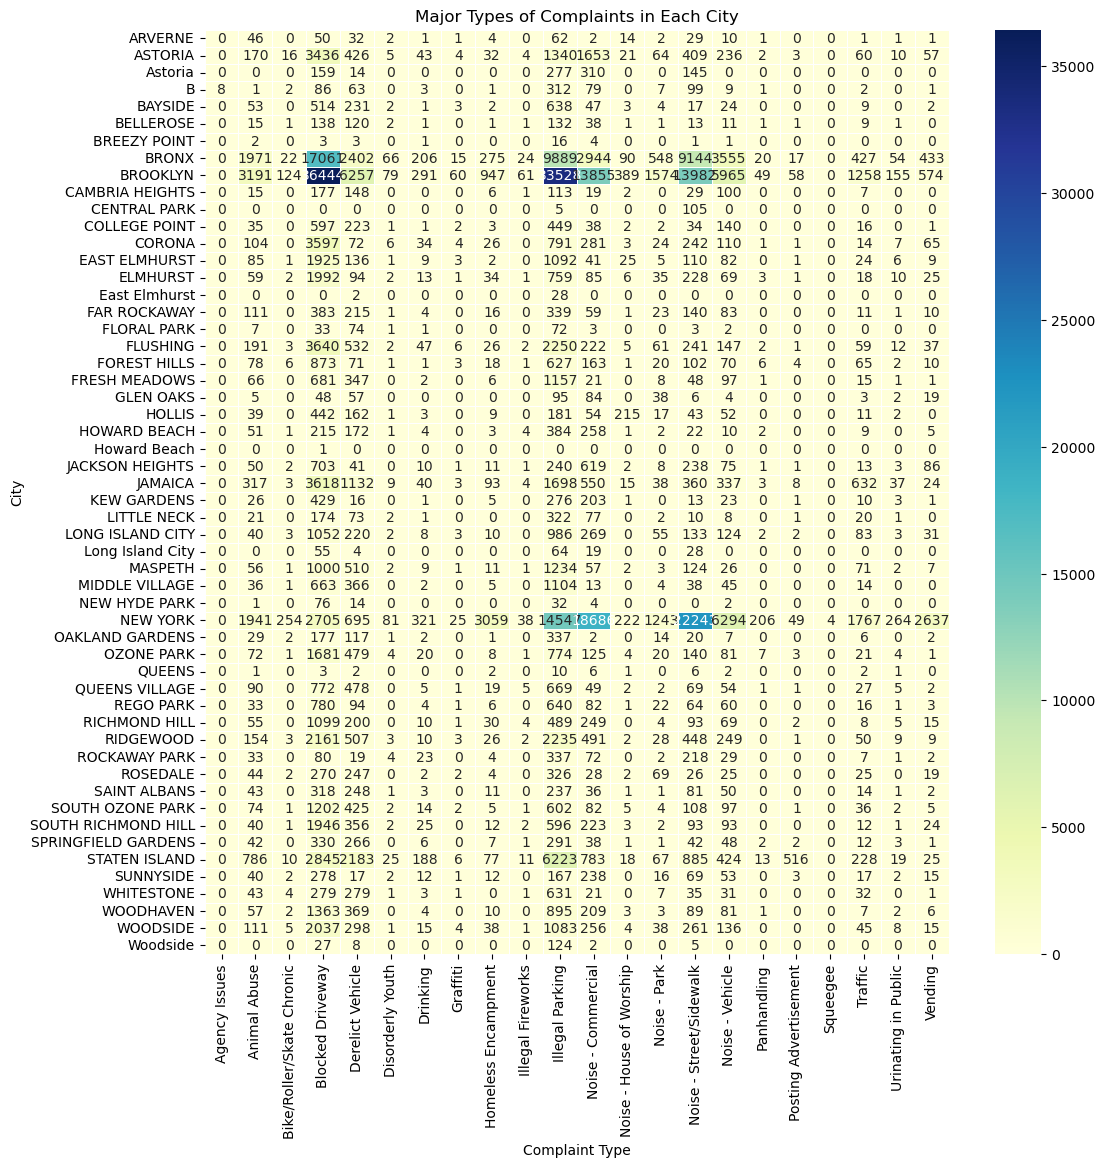

In [57]:

plt.figure(figsize=(12, 12))
sns.heatmap(complaints_by_city, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Major Types of Complaints in Each City')
plt.show()

## Step 7: Check if the average response time across various types of complaints
##### Average response time across various types of complaints

In [58]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
df['Response Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600 

In [59]:
avg_response_time_by_complaint = df.groupby('Complaint Type')['Response Time'].mean().sort_values(ascending=False)
print("Average Response Time by Complaint Type in hours:")
print(avg_response_time_by_complaint)

Average Response Time by Complaint Type in hours:
Complaint Type
Derelict Vehicle             7.044693
Graffiti                     6.465651
Agency Issues                5.080312
Animal Abuse                 5.009043
Blocked Driveway             4.509039
Panhandling                  4.403764
Illegal Parking              4.347207
Homeless Encampment          4.293482
Squeegee                     4.044514
Vending                      3.990887
Drinking                     3.839250
Bike/Roller/Skate Chronic    3.645469
Urinating in Public          3.599804
Noise - Vehicle              3.489398
Disorderly Youth             3.434375
Traffic                      3.420344
Noise - Street/Sidewalk      3.397737
Noise - Park                 3.394417
Noise - House of Worship     3.164191
Noise - Commercial           3.079373
Illegal Fireworks            2.809301
Posting Advertisement        2.024214
Name: Response Time, dtype: float64


## Step 8: Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [60]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Complaint Type'], df['City'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square value:", chi2)
print("p-value:", p)

Chi-square value: 136196.91474410635
p-value: 0.0
